# Import all necessary packages

In [ ]:
import os                        # To access local system files
import numpy as np               # To handling arrays
import pandas as pd              # To data manipulation and analysis
import seaborn as sns            # To data visualization
import matplotlib.pyplot as plt  # To plotting graphs
plt.style.use('ggplot')          # Make style as ggplot
import scipy.stats as stats      # Statistics
from sklearn.model_selection import train_test_split  # To split the dataset
from sklearn.feature_selection import SelectKBest     # To Choose the best␣features
from sklearn.feature_selection import f_regression    # To Choose the best␣features
from sklearn.linear_model import LogisticRegression   # Prediction model
from sklearn.ensemble import RandomForestClassifier   # Prediction model
from sklearn.model_selection import GridSearchCV      # To model tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   # Metrics to evaluate

# Loading files into dataframes

### Brighton Weather Data

In [ ]:
# Brighton Weather Data
brighton = r"M:\Data science\weatherdata_for_students\brighton"

# Initialize an empty list to store dataframes
dfs = []

# List out all files from brighton folder
for file in os.listdir(brighton):
    # Select csv files only
    if file.endswith(".csv"):
        # Read the CSV file into a dataframe
        df = pd.read_csv(os.path.join(brighton, file))
    # Checking if the first column of the DataFrame is '0'
    if df.columns[0] =='0':
        # Setting column names from the first row values
        df.columns = df.iloc[0]
        #Droping the first row values
        df = df.drop(0).reset_index(drop=True)
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes in the list into a single dataframe
brighton_df = pd.concat(dfs, ignore_index=True)

brighton_df.shape

(74843, 16)

### Colchester Weather Data

In [ ]:
# Colchester Weather Data
colchester = r"M:\Data science\weatherdata_for_students\colchester"

# Initialize an empty list to store dataframes
dfs = []

# List out all files from brighton folder
for file in os.listdir(colchester):
    # Select csv files only
    if file.endswith(".csv"):
        # Read the CSV file into a dataframe
        df = pd.read_csv(os.path.join(colchester, file))
    # Checking if the first column of the DataFrame is '0'
    if df.columns[0] =='0':
        # Setting column names from the first row values
        df.columns = df.iloc[0]
        #Droping the first row values
        df = df.drop(0).reset_index(drop=True)
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes in the list into a single dataframe
colchester_df = pd.concat(dfs, ignore_index=True)

colchester_df.shape

(106556, 16)

# Data Understanding and Pre-Processing

There are some duplicates in Brighton

In [ ]:
brighton_df['datetime'].duplicated().sum()

6

No more duplicates

In [ ]:
brighton_df = brighton_df.loc[~brighton_df.duplicated(subset = 'datetime')].reset_index(drop = True)
brighton_df['datetime'].duplicated().sum()

0

There are some duplicates in Colchester

In [ ]:
colchester_df['datetime'].duplicated().sum()

11

No more duplicates

In [ ]:
colchester_df = colchester_df.loc[~colchester_df.duplicated(subset = 'datetime')].reset_index(drop = True)
colchester_df['datetime'].duplicated().sum()

0

### Combining Dataframes into One

In [ ]:
brighton_df['City'] = 'Brighton'
brighton_df.insert(0, 'City', brighton_df.pop('City'))

colchester_df['City'] = 'Colchester'
colchester_df.insert(0, 'City', colchester_df.pop('City'))

city_df = pd.concat([brighton_df, colchester_df], ignore_index = True)
city_df.shape

(181382, 17)

### Renaming Column Names

In [ ]:
city_df.columns

Index(['City', 'datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'uvindex'],
      dtype='object', name=0)

In [ ]:
city_df = city_df.rename(columns = {'datetime': 'Date_Time',
                          'temp': 'Temperature',
                          'dew': 'Dew',
                          'humidity': 'Humidity',
                          'precip': 'Precipitation',
                          'precipprob': 'Precipitation_Probability',
                          'preciptype': 'Precipitation_Type',
                          'snow': 'Snow',
                          'snowdepth': 'Snow_Depth',
                          'windspeed': 'Wind_Speed',
                          'winddir': 'Wind_Direction',
                          'sealevelpressure':'Sea_Level_Pressure',
                          'cloudcover': 'Cloud_Cover',
                          'solarradiation': 'Solar_Radiation',
                          'solarenergy': 'Solar_Energy',
                          'uvindex': 'UV_Index'})

In [ ]:
city_df.head()

,City,Date_Time,Temperature,Dew,Humidity,Precipitation,Precipitation_Probability,Precipitation_Type,Snow,Snow_Depth,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Solar_Radiation,Solar_Energy,UV_Index
0,Brighton,2010-05-01T00:00:00,10.5,10.3,98.34,0.0,0.0,NaN,0.0,0.0,23.1,246.0,1010.3,78.6,0.0,0.0,0.0
1,Brighton,2010-05-01T01:00:00,10.5,10.3,98.66,0.071,100.0,rain,0.0,0.0,20.2,238.0,1010.1,76.3,0.0,0.0,0.0
2,Brighton,2010-05-01T02:00:00,10.3,10.1,98.65,0.0,0.0,NaN,0.0,0.0,20.1,238.0,1009.7,69.1,0.0,0.0,0.0
3,Brighton,2010-05-01T03:00:00,10.2,10.0,98.88,0.0,0.0,NaN,0.0,0.0,19.9,245.0,1009.5,49.8,0.0,0.0,0.0
4,Brighton,2010-05-01T04:00:00,10.0,9.9,99.01,0.0,0.0,NaN,0.0,0.0,15.3,247.0,1009.4,61.8,0.0,0.0,0.0


### Modifying Variable Datatype

##### All variables are in object datatype, but they are supposed to be some other datatypes. So I modified that as the way I wanted.

In [ ]:
city_df.dtypes

0
City                         object
Date_Time                    object
Temperature                  object
Dew                          object
Humidity                     object
Precipitation                object
Precipitation_Probability    object
Precipitation_Type           object
Snow                         object
Snow_Depth                   object
Wind_Speed                   object
Wind_Direction               object
Sea_Level_Pressure           object
Cloud_Cover                  object
Solar_Radiation              object
Solar_Energy                 object
UV_Index                     object
dtype: object

In [ ]:
city_df['Date_Time']= pd.to_datetime(city_df['Date_Time'])

city_df['City'] = pd.Categorical(city_df['City'])

city_df['Precipitation_Type'] = pd.Categorical(city_df['Precipitation_Type'])

columns = ['City', 'Date_Time', 'Precipitation_Type']

for i in city_df.columns:
    if i not in columns:
        city_df[i] = pd.to_numeric(city_df[i], errors = 'coerce')

city_df.dtypes

0
City                               category
Date_Time                    datetime64[ns]
Temperature                         float64
Dew                                 float64
Humidity                            float64
Precipitation                       float64
Precipitation_Probability           float64
Precipitation_Type                 category
Snow                                float64
Snow_Depth                          float64
Wind_Speed                          float64
Wind_Direction                      float64
Sea_Level_Pressure                  float64
Cloud_Cover                         float64
Solar_Radiation                     float64
Solar_Energy                        float64
UV_Index                            float64
dtype: object

## Replace Missing Values

In [ ]:
city_df.isna().sum()

0
City                              0
Date_Time                         0
Temperature                     374
Dew                             424
Humidity                        429
Precipitation                   516
Precipitation_Probability       427
Precipitation_Type           163979
Snow                          23538
Snow_Depth                    24039
Wind_Speed                      399
Wind_Direction                  414
Sea_Level_Pressure             4589
Cloud_Cover                    1512
Solar_Radiation               51042
Solar_Energy                  51056
UV_Index                      51048
dtype: int64

##### As we can see that there are more null values in our dataset which can lead to errors or unexpected behavior during EDA and model training.
##### Therefore, I have replaced them with their mean value for each group of precipitation type.

#### Temperature, Dew, Humidity, Precipitation

In [ ]:
for col in city_df.columns[2:6]:
    rain = city_df[city_df['Precipitation_Type'] == 'rain'][col].mean().round(1)
    snow = city_df[city_df['Precipitation_Type'] == 'snow'][col].mean().round(1)
    r_s = city_df[city_df['Precipitation_Type'] == 'rain,snow'][col].mean().round(1)
    na = city_df[city_df['Precipitation_Type'].isna()][col].mean().round(1)

    city_df.loc[city_df['Precipitation_Type'] == 'rain', col] = city_df.loc[city_df['Precipitation_Type'] == 'rain', col].fillna(rain)
    city_df.loc[city_df['Precipitation_Type'] == 'snow', col] = city_df.loc[city_df['Precipitation_Type'] == 'snow', col].fillna(snow)
    city_df.loc[city_df['Precipitation_Type'] == 'rain,snow', col] = city_df.loc[city_df['Precipitation_Type'] == 'rain,snow', col].fillna(r_s)
    city_df.loc[city_df['Precipitation_Type'].isna(), col] = city_df.loc[city_df['Precipitation_Type'].isna(), col].fillna(na)

#### Precipitation Propability

In [ ]:
rain = city_df[city_df['Precipitation_Type'] == 'rain']['Precipitation_Probability'].max()
snow = city_df[city_df['Precipitation_Type'] == 'snow']['Precipitation_Probability'].max()
r_s = city_df[city_df['Precipitation_Type'] == 'rain,snow']['Precipitation_Probability'].max()
na = city_df[city_df['Precipitation_Type'].isna()]['Precipitation_Probability'].min()

city_df.loc[city_df['Precipitation_Type'] == 'rain', 'Precipitation_Probability'] = city_df.loc[city_df['Precipitation_Type'] == 'rain', 'Precipitation_Probability'].fillna(rain)
city_df.loc[city_df['Precipitation_Type'] == 'snow', 'Precipitation_Probability'] = city_df.loc[city_df['Precipitation_Type'] == 'snow', 'Precipitation_Probability'].fillna(snow)
city_df.loc[city_df['Precipitation_Type'] == 'rain,snow','Precipitation_Probability'] = city_df.loc[city_df['Precipitation_Type'] == 'rain,snow', 'Precipitation_Probability'].fillna(r_s)
city_df.loc[city_df['Precipitation_Type'].isna(), 'Precipitation_Probability'] = city_df.loc[city_df['Precipitation_Type'].isna(), col].fillna(na)

#### Snow, Snow Depth, Wind Speed, Wind Direction

#### Sea Level Pressure, Cloud Cover, Solar Radiation, Solar Energy

In [ ]:
for col in city_df.columns[8:]:
    rain = city_df[city_df['Precipitation_Type'] == 'rain'][col].mean().round(1)
    snow = city_df[city_df['Precipitation_Type'] == 'snow'][col].mean().round(1)
    r_s = city_df[city_df['Precipitation_Type'] == 'rain,snow'][col].mean().round(1)
    na = city_df[city_df['Precipitation_Type'].isna()][col].mean().round(1)

    city_df.loc[city_df['Precipitation_Type'] == 'rain', col] = city_df.loc[city_df['Precipitation_Type'] == 'rain', col].fillna(rain)
    city_df.loc[city_df['Precipitation_Type'] == 'snow', col] = city_df.loc[city_df['Precipitation_Type'] == 'snow', col].fillna(snow)
    city_df.loc[city_df['Precipitation_Type'] == 'rain,snow', col] = city_df.loc[city_df['Precipitation_Type'] == 'rain,snow', col].fillna(r_s)
    city_df.loc[city_df['Precipitation_Type'].isna(), col] = city_df.loc[city_df['Precipitation_Type'].isna(), col].fillna(na)

#### UV Index

In [ ]:
rain = city_df[city_df['Precipitation_Type'] == 'rain']['UV_Index'].mean().round()
snow = city_df[city_df['Precipitation_Type'] == 'snow']['UV_Index'].mean().round()
r_s = city_df[city_df['Precipitation_Type'] == 'rain,snow']['UV_Index'].mean().round()
na = city_df[city_df['Precipitation_Type'].isna()]['UV_Index'].mean().round()

city_df.loc[city_df['Precipitation_Type'] == 'rain', 'UV_Index'] = city_df.loc[city_df['Precipitation_Type'] == 'rain', 'UV_Index'].fillna(rain)
city_df.loc[city_df['Precipitation_Type'] == 'snow', 'UV_Index'] = city_df.loc[city_df['Precipitation_Type'] == 'snow', 'UV_Index'].fillna(snow)
city_df.loc[city_df['Precipitation_Type'] == 'rain,snow', 'UV_Index'] = city_df.loc[city_df['Precipitation_Type'] == 'rain,snow', 'UV_Index'].fillna(r_s)
city_df.loc[city_df['Precipitation_Type'].isna(), 'UV_Index'] = city_df.loc[city_df['Precipitation_Type'].isna(), 'UV_Index'].fillna(na)

city_df['UV_Index'] = city_df['UV_Index'].astype(int)

#### Precipitation Type

##### We can see that more than 90% of the preciptype feature having null values.
##### I don't like to keep the null values in my dataset as I going to analyse this. The possible precipitation types are rain, snow, and 'rain,snow'.
##### And if the precipitation propablity is 0 then there was no chance of rain, snow and 'rain,snow' at the particular day and time.
##### I've modified null values based on precipitation probability.

In [ ]:
city_df['Precipitation_Type'].unique()

# Convert 'Precipitation Type' column to categorical dtype with 'neither rain nor snow' as a category
city_df['Precipitation_Type'] = city_df['Precipitation_Type'].astype('category').cat.add_categories(['neither_rain_nor_snow'])

# Fill NaN values with the 'neither rain nor snow' and 'rain,snow' categories based on the conditions
city_df.loc[(city_df['Precipitation_Probability'] == 0.0) & city_df['Precipitation_Type'].isna(), 'Precipitation_Type'] = 'neither_rain_nor_snow'
city_df.loc[(city_df['Precipitation_Probability'] != 0.0) & city_df['Precipitation_Type'].isna(), 'Precipitation_Type'] = 'rain,snow'

city_df['Precipitation_Type'].unique()

['neither_rain_nor_snow', 'rain', 'rain,snow', 'snow']
Categories (4, object): ['rain', 'rain,snow', 'snow', 'neither_rain_nor_snow']

In [ ]:
city_df.isna().sum()

0
City                         0
Date_Time                    0
Temperature                  0
Dew                          0
Humidity                     0
Precipitation                0
Precipitation_Probability    0
Precipitation_Type           0
Snow                         0
Snow_Depth                   0
Wind_Speed                   0
Wind_Direction               0
Sea_Level_Pressure           0
Cloud_Cover                  0
Solar_Radiation              0
Solar_Energy                 0
UV_Index                     0
dtype: int64

No more null values

In [ ]:
city_df[['Date_Time', 'City']].duplicated().sum()

0

Dataframe with 0 null and 0 duplicate value.

In [ ]:
city_df.describe()

,Date_Time,Temperature,Dew,Humidity,Precipitation,Precipitation_Probability,Snow,Snow_Depth,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Solar_Radiation,Solar_Energy,UV_Index
count,181382,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000
mean,2013-12-29 13:37:45.128844544,10.850236,7.561227,81.646877,0.071654,9.419439,0.000921,0.069801,15.869355,197.066439,1014.661298,59.414557,137.044686,0.491591,1.250146
min,2000-12-27 00:00:00,-9.600000,-11.600000,22.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010-03-19 15:15:00,6.500000,3.900000,73.690000,0.000000,0.000000,0.000000,0.000000,9.800000,121.000000,1009.200000,34.700000,0.000000,0.000000,0.000000
50%,2014-04-13 15:00:00,10.900000,7.900000,85.080000,0.000000,0.000000,0.000000,0.000000,14.500000,220.000000,1015.700000,65.700000,103.000000,0.400000,1.000000
75%,2019-07-01 20:45:00,15.300000,11.500000,92.450000,0.000000,0.000000,0.000000,0.000000,20.800000,267.000000,1022.100000,88.000000,141.400000,0.500000,1.000000
max,2024-01-06 11:00:00,35.000000,21.500000,100.000000,84.324000,100.000000,9.100000,96.000000,74.700000,360.000000,1049.300000,100.000000,1150.000000,4.100000,10.000000
std,NaN,6.011577,5.148729,13.659712,0.677080,29.209823,0.044694,0.616374,8.208194,100.244391,25.988530,31.667367,183.216565,0.660044,1.853489


In [ ]:
city_df.nunique(axis = 0)

0
City                              2
Date_Time                    143274
Temperature                     423
Dew                             317
Humidity                       6512
Precipitation                  3053
Precipitation_Probability        28
Precipitation_Type                4
Snow                             40
Snow_Depth                      845
Wind_Speed                      599
Wind_Direction                  636
Sea_Level_Pressure              785
Cloud_Cover                    1001
Solar_Radiation                6184
Solar_Energy                     41
UV_Index                         11
dtype: int64

In [ ]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181382 entries, 0 to 181381
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   City                       181382 non-null  category      
 1   Date_Time                  181382 non-null  datetime64[ns]
 2   Temperature                181382 non-null  float64       
 3   Dew                        181382 non-null  float64       
 4   Humidity                   181382 non-null  float64       
 5   Precipitation              181382 non-null  float64       
 6   Precipitation_Probability  181382 non-null  float64       
 7   Precipitation_Type         181382 non-null  category      
 8   Snow                       181382 non-null  float64       
 9   Snow_Depth                 181382 non-null  float64       
 10  Wind_Speed                 181382 non-null  float64       
 11  Wind_Direction             181382 non-null  float64 

# Exploratory Data Analysis

## Questions

### 1. Whether there will be surplus energy from wind?

### 2. Whether there will be surplus energy from solar?

### 3. What are the infulencing features to predict these two renewable energies?

## Uni, Bi, Multivariate Analysis

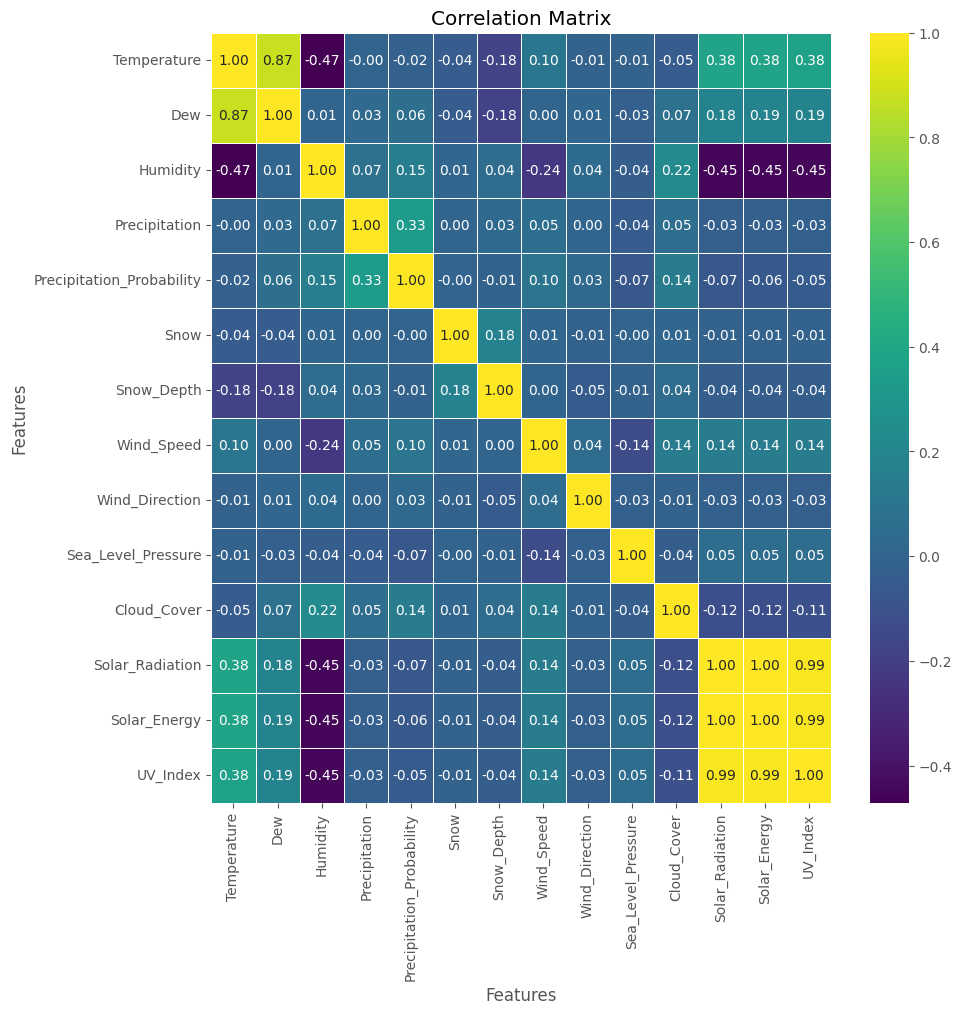

In [ ]:
# Drop columns
sub_df = city_df.drop(columns = ['City', 'Date_Time', 'Precipitation_Type'], axis = 1)

# Correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(sub_df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

It seems solar radiation, solar energy, UV index have very strong positive correlation between each other.
The temperature and dew has the next positive strong correlation of 0.87.
But other variables have moderate negative to low positive correlation between each other.
The moderate negative correlation has occurred between humidity vs temperature, solar radiation, solar energy, UV index. Which means if the humidity
is higher then there might not be any surplus in solar energy. In other way, if the humudity is low then there might be surplus in solar energy.

##### Therefore, I interested in features such as Temperature, Dew, Humidity, Snow, Snow Depth, Wind Speed, Wind Direction, Sea Level Pressure, Cloud Cover, Solar Radiation, Solar Energy, UV Index.

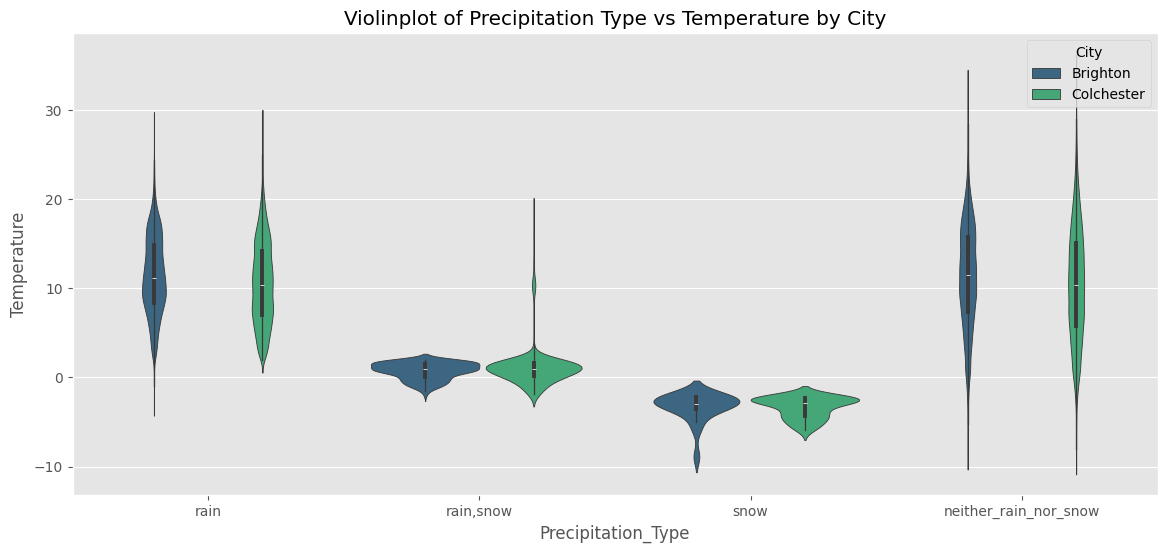

In [ ]:
# Violinplot of Temperature
plt.figure(figsize = (14, 6))
sns.violinplot(data=city_df, x='Precipitation_Type', y='Temperature', hue = 'City', palette='viridis')
plt.title('Violinplot of Precipitation Type vs Temperature by City')
plt.show()

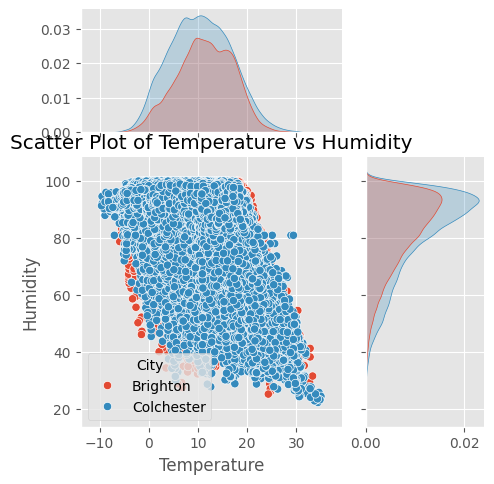

In [ ]:
# Scatter Plot of Temperature vs Humidity
sns.jointplot(x="Temperature", y="Humidity", data=city_df,hue="City", height=5, ratio=2, marginal_ticks=True)
plt.title('Scatter Plot of Temperature vs Humidity')
plt.show()

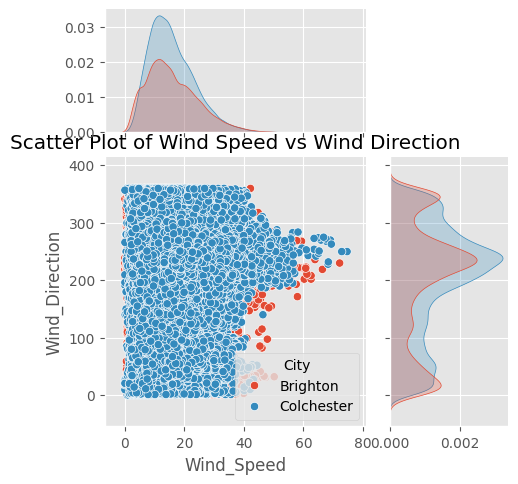

In [ ]:
# Scatter Plot of Wind Speed vs Wind Direction
sns.jointplot(x="Wind_Speed", y="Wind_Direction", data=city_df, hue="City", height=5, ratio=2, marginal_ticks=True)
plt.title('Scatter Plot of Wind Speed vs Wind Direction')
plt.show()

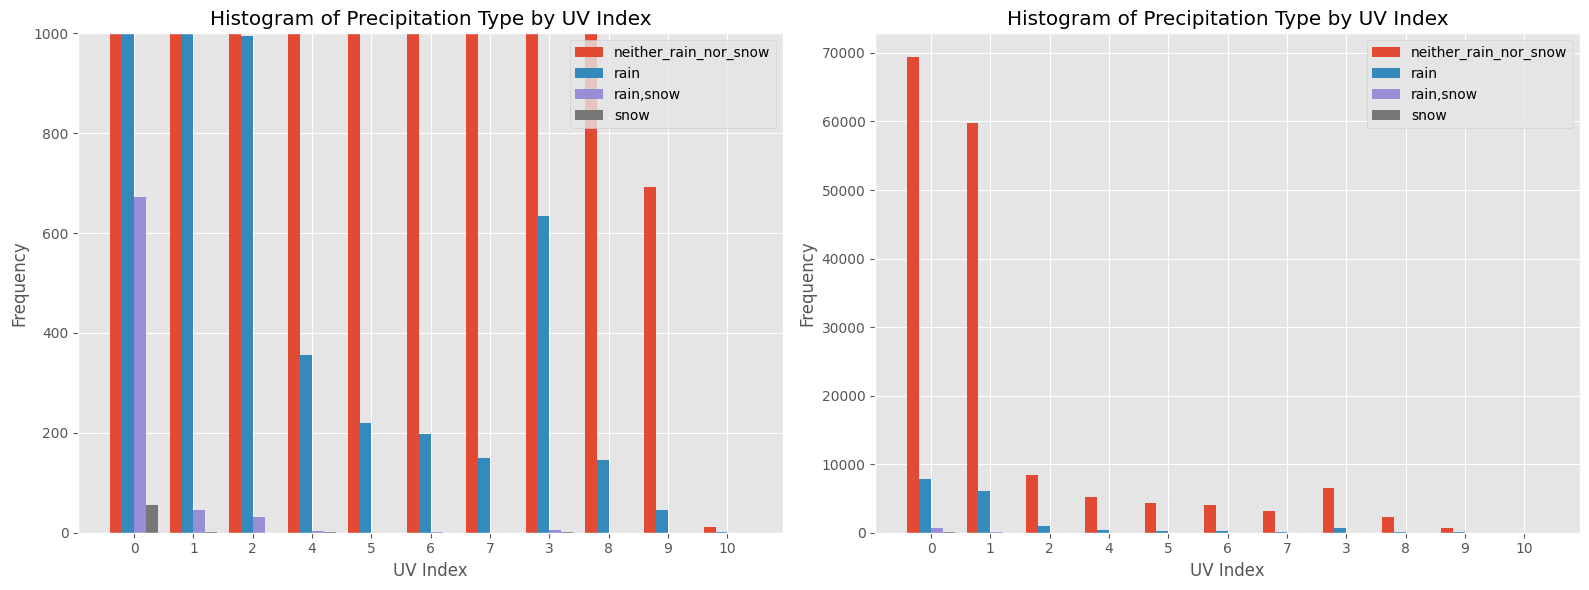

In [ ]:
categories = city_df['Precipitation_Type'].unique()
x_values = city_df['UV_Index'].unique()
num_categories = len(categories)

plt.figure(figsize=(16, 6))

# Calculate the width for each category
bar_width = 0.8 / num_categories

plt.subplot(1, 2, 1)
for i, category in enumerate(categories):
    x = np.arange(len(x_values)) + i * bar_width
    data = [city_df[(city_df['Precipitation_Type'] == category) & (city_df['UV_Index'] == uv)]['UV_Index'].count() for uv in x_values]
    plt.bar(x, data, width=bar_width, label=category)

plt.xlabel('UV Index')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Type by UV Index')
plt.xticks(np.arange(len(x_values)) + (bar_width * (num_categories - 1)) / 2, x_values)
plt.legend()
plt.grid(True)
plt.ylim(0, 1000)

plt.subplot(1, 2, 2)
for i, category in enumerate(categories):
    x = np.arange(len(x_values)) + i * bar_width
    data = [city_df[(city_df['Precipitation_Type'] == category) & (city_df['UV_Index'] == uv)]['UV_Index'].count() for uv in x_values]
    plt.bar(x, data, width=bar_width, label=category)

plt.xlabel('UV Index')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Type by UV Index')
plt.xticks(np.arange(len(x_values)) + (bar_width * (num_categories - 1)) / 2, x_values)
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

##### The above plot describes the instances of various Precipitation Types and UV Index Number.

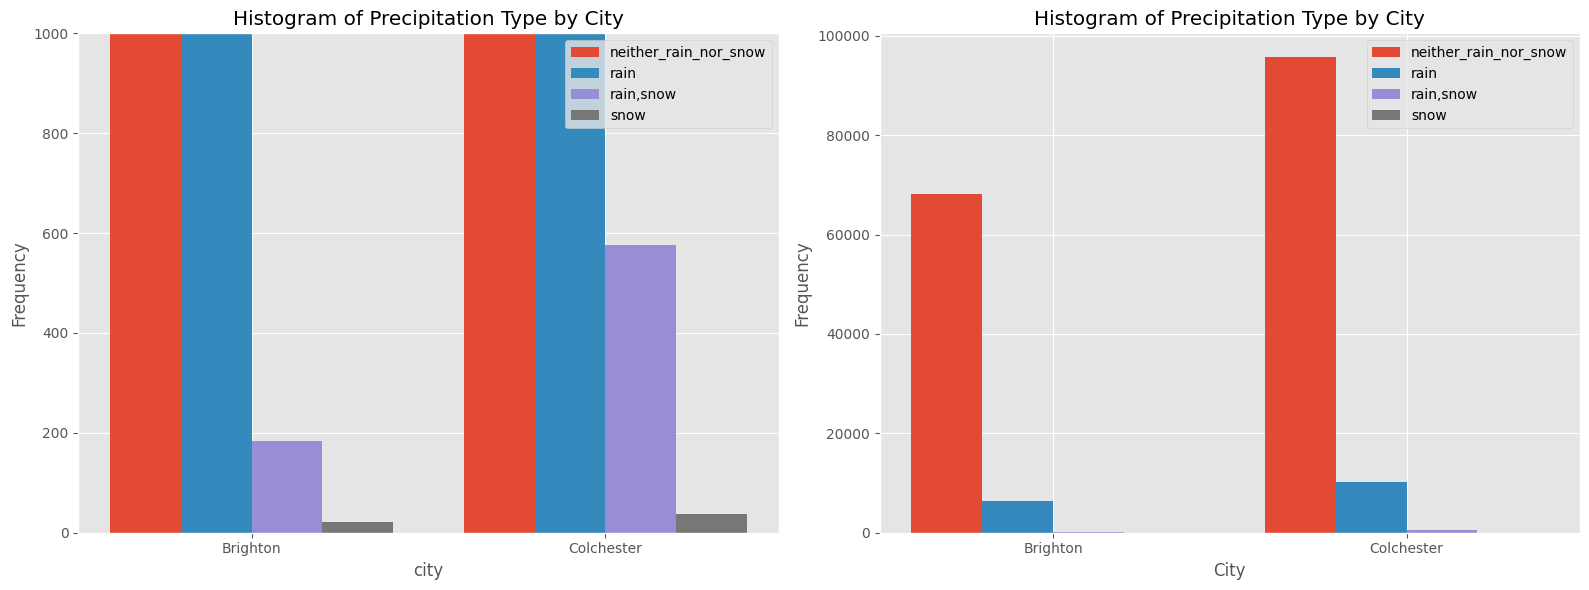

In [ ]:
categories = city_df['Precipitation_Type'].unique()
x_values = city_df['City'].unique()
num_categories = len(categories)

plt.figure(figsize=(16, 6))
bar_width = 0.8 / num_categories

plt.subplot(1, 2, 1)
for i, category in enumerate(categories):
    x = np.arange(len(x_values)) + i * bar_width
    data = [city_df[(city_df['Precipitation_Type'] == category) & (city_df['City'] == uv)]['City'].count() for uv in x_values]
    plt.bar(x, data, width=bar_width, label=category)

plt.xlabel('city')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Type by City')
plt.xticks(np.arange(len(x_values)) + (bar_width * (num_categories - 1)) / 2, x_values)
plt.legend()
plt.grid(True)
plt.ylim(0, 1000)

plt.subplot(1, 2, 2)
for i, category in enumerate(categories):
    x = np.arange(len(x_values)) + i * bar_width
    data = [city_df[(city_df['Precipitation_Type'] == category) & (city_df['City'] == uv)]['City'].count() for uv in x_values]
    plt.bar(x, data, width=bar_width, label=category)

plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Type by City')
plt.xticks(np.arange(len(x_values)) + (bar_width * (num_categories - 1)) / 2, x_values)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### The above plot describes the instances of various Precipitation Types and City.

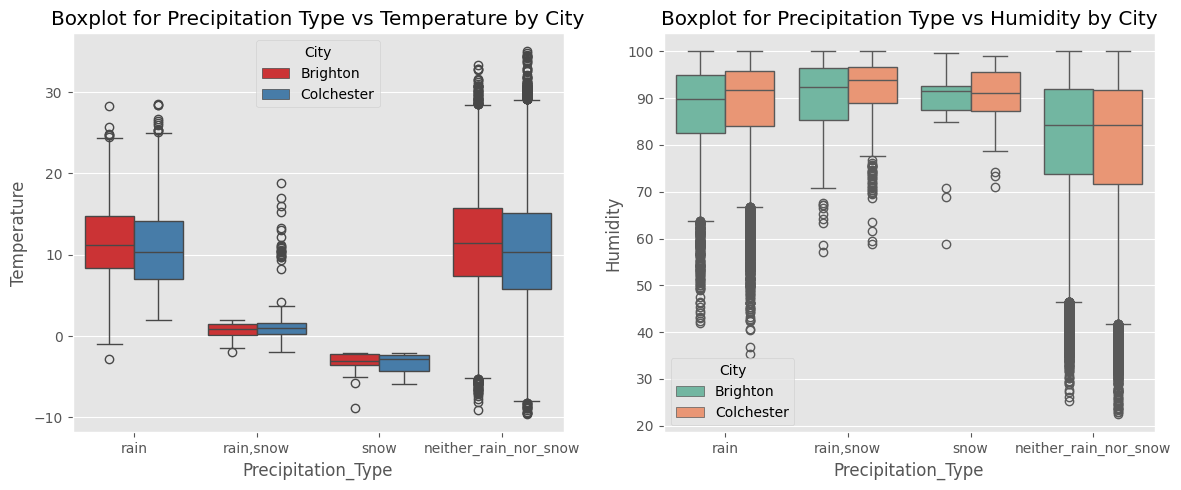

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot of Temperature
sns.boxplot(data=city_df, x='Precipitation_Type', y='Temperature', hue='City', palette='Set1', ax = axes[0])
axes[0].set_title('Boxplot for Precipitation Type vs Temperature by City')

# Boxplot of Humidity
sns.boxplot(data=city_df, x='Precipitation_Type', y='Humidity', hue='City', palette='Set2', ax = axes[1])
axes[1].set_title('Boxplot for Precipitation Type vs Humidity by City')

plt.tight_layout()
plt.show()

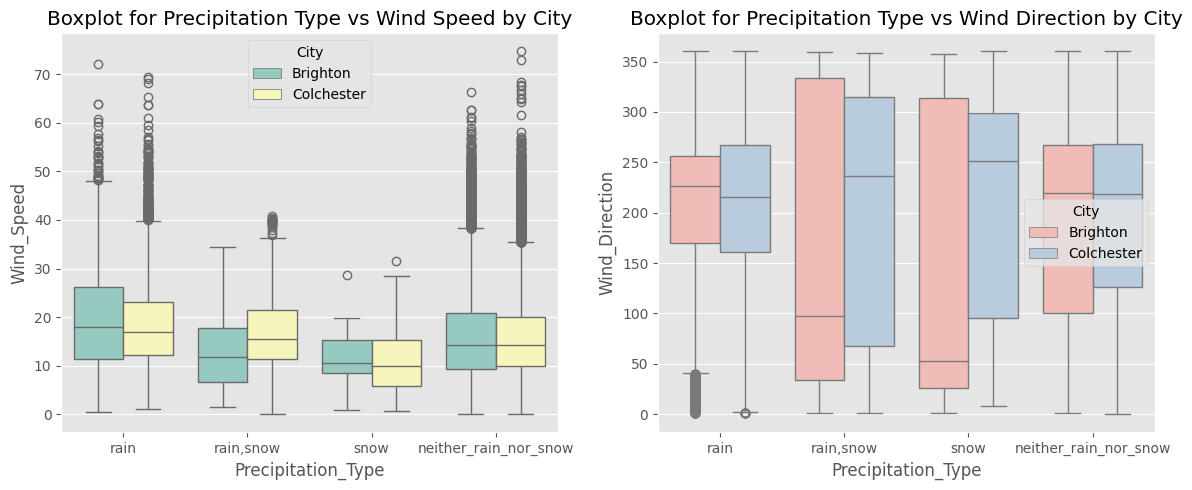

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot of Wind Speed
sns.boxplot(data=city_df, x='Precipitation_Type', y='Wind_Speed', hue='City', palette='Set3', ax = axes[0])
axes[0].set_title('Boxplot for Precipitation Type vs Wind Speed by City')

# Boxplot of Wind Direction
sns.boxplot(data=city_df, x='Precipitation_Type', y='Wind_Direction', hue='City', palette='Pastel1', ax = axes[1])
axes[1].set_title('Boxplot for Precipitation Type vs Wind Direction by City')

plt.tight_layout()
plt.show()

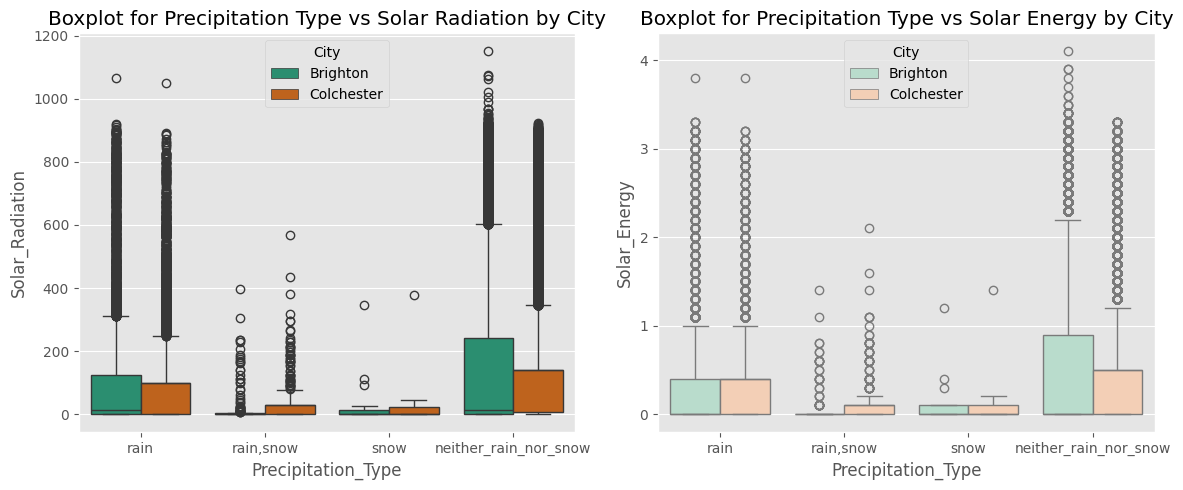

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot of Solar Radiation
sns.boxplot(data=city_df, x='Precipitation_Type', y='Solar_Radiation', hue='City', palette='Dark2', ax = axes[0])
axes[0].set_title('Boxplot for Precipitation Type vs Solar Radiation by City')

# Boxplot of Solar Energy
sns.boxplot(data=city_df, x='Precipitation_Type', y='Solar_Energy', hue='City', palette='Pastel2', ax = axes[1])
axes[1].set_title('Boxplot for Precipitation Type vs Solar Energy by City')

plt.tight_layout()
plt.show()

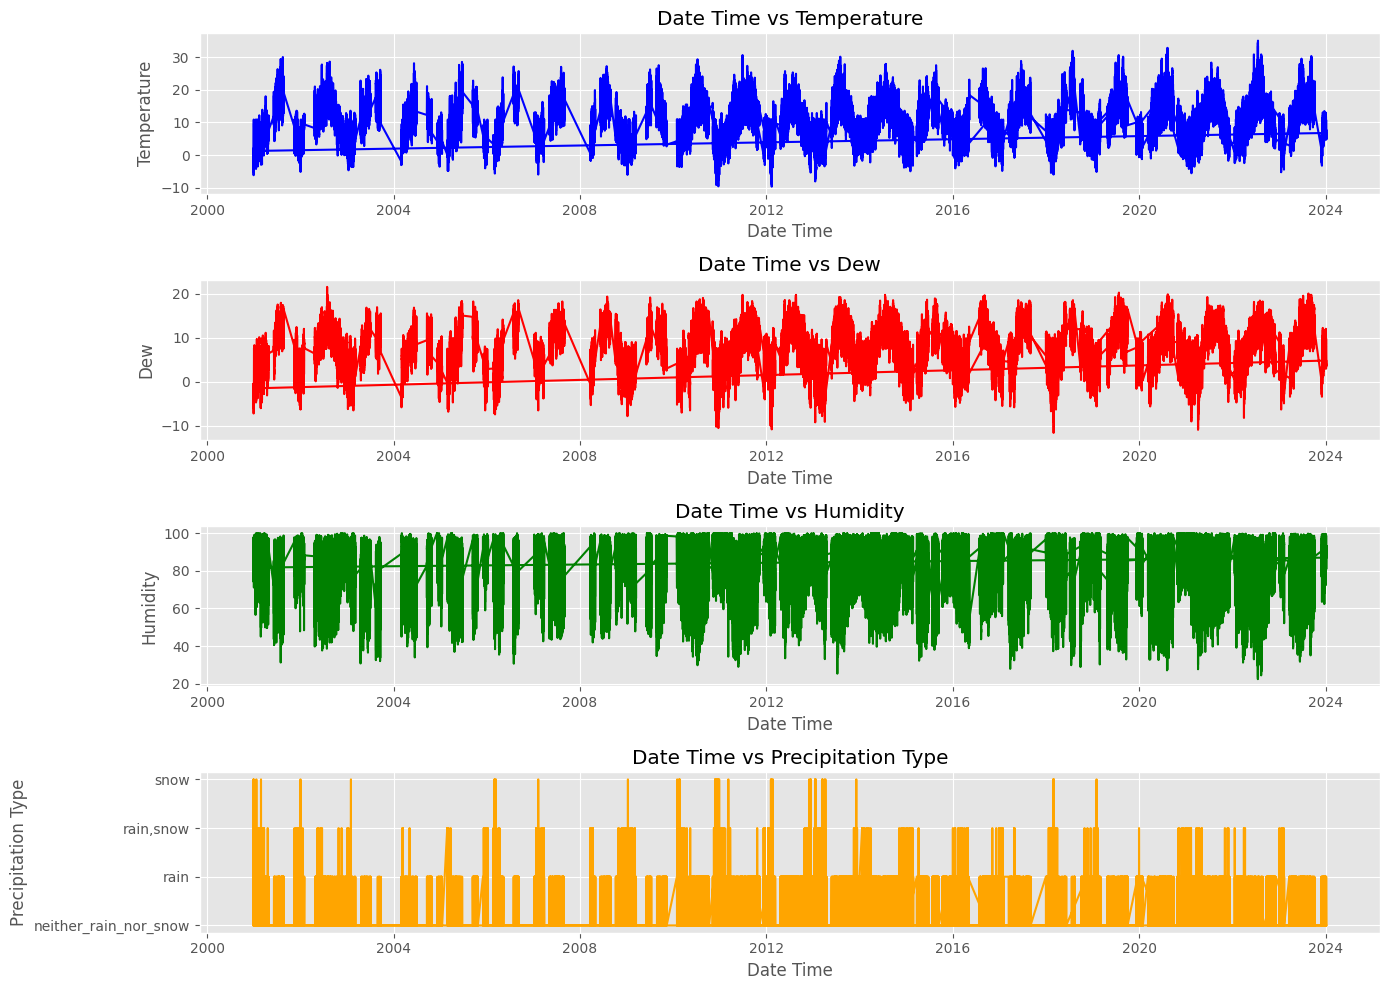

In [ ]:
# Subplots for each variable
fig, axs = plt.subplots(4, 1, figsize=(14, 10))

# Plot 'Temperature' against 'Date Time'
axs[0].plot(city_df['Date_Time'], city_df['Temperature'], color='blue')
axs[0].set_title('Date Time vs Temperature')
axs[0].set_xlabel('Date Time')
axs[0].set_ylabel('Temperature')

# Plot 'Dew' against 'Date Time'
axs[1].plot(city_df['Date_Time'], city_df['Dew'], color='red')
axs[1].set_title('Date Time vs Dew')
axs[1].set_xlabel('Date Time')
axs[1].set_ylabel('Dew')

# Plot 'Humidity' against 'Date Time'
axs[2].plot(city_df['Date_Time'], city_df['Humidity'], color='green')
axs[2].set_title('Date Time vs Humidity')
axs[2].set_xlabel('Date Time')
axs[2].set_ylabel('Humidity')

# Plot 'Precipitation Type' against 'Date Time'
axs[3].plot(city_df['Date_Time'], city_df['Precipitation_Type'], color='orange')
axs[3].set_title('Date Time vs Precipitation Type')
axs[3].set_xlabel('Date Time')
axs[3].set_ylabel('Precipitation Type')

plt.tight_layout()
plt.show()

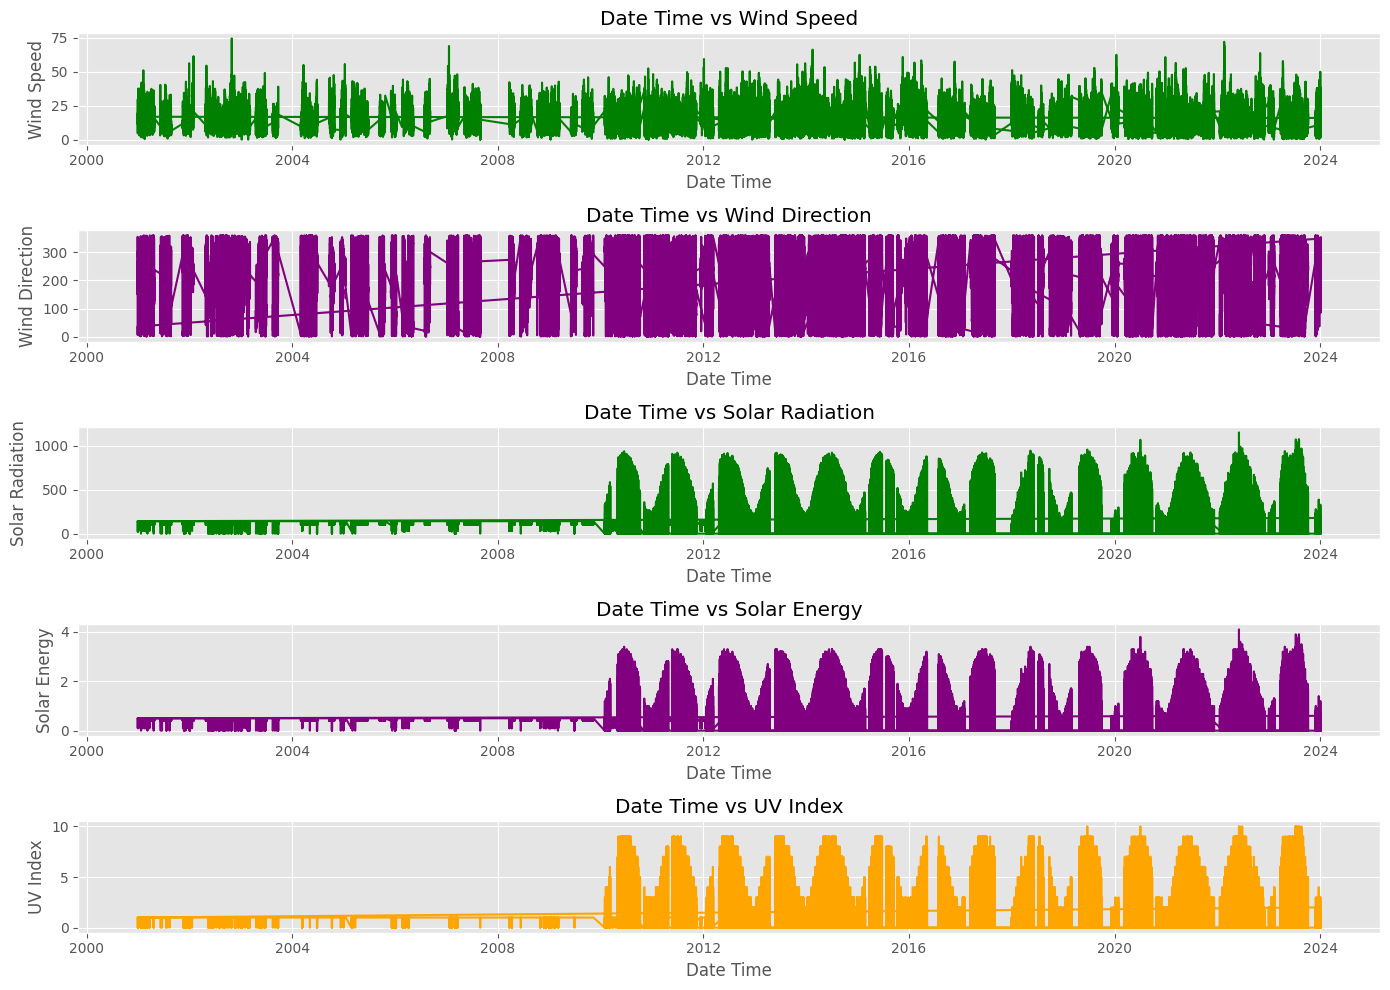

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(14, 10))

# Plot 'Wind Speed' against 'Date Time'
axs[0].plot(city_df['Date_Time'], city_df['Wind_Speed'], color='green')
axs[0].set_title('Date Time vs Wind Speed')
axs[0].set_xlabel('Date Time')
axs[0].set_ylabel('Wind Speed')

# Plot 'Wind Direction' against 'Date Time'
axs[1].plot(city_df['Date_Time'], city_df['Wind_Direction'], color='purple')
axs[1].set_title('Date Time vs Wind Direction')
axs[1].set_xlabel('Date Time')
axs[1].set_ylabel('Wind Direction')

# Plot 'Solar Radiation' against 'Date Time'
axs[2].plot(city_df['Date_Time'], city_df['Solar_Radiation'], color='green')
axs[2].set_title('Date Time vs Solar Radiation')
axs[2].set_xlabel('Date Time')
axs[2].set_ylabel('Solar Radiation')

# Plot 'Solar Energy' against 'Date Time'
axs[3].plot(city_df['Date_Time'], city_df['Solar_Energy'], color='purple')
axs[3].set_title('Date Time vs Solar Energy')
axs[3].set_xlabel('Date Time')
axs[3].set_ylabel('Solar Energy')

# Plot 'UV Index' against 'Date Time'
axs[4].plot(city_df['Date_Time'], city_df['UV_Index'], color='orange')
axs[4].set_title('Date Time vs UV Index')
axs[4].set_xlabel('Date Time')
axs[4].set_ylabel('UV Index')

plt.tight_layout()
plt.show()

# Feature Engineering and Selection

<!-- *Brighton*

The average threshold for wind energy production depends on several factors,
including the type of wind turbine, local conditions, and specific energy needs.
However, let’s explore the wind conditions in Brighton to know more.


Wind speed is a critical factor for energy production because
it directly impacts a turbine’s ability to generate electicions:


Wind turbine ratings are often specified under standard conditions:
Temperature: Approximately 10 to 15° C.
Altitude: Sea level.
The average wind direction in Brighton (Seafront) is Southwest (Approximately 180 to 270 degrees)
and Brighton (General) is North (Approximately 315 to 45 degrees)


Now, let’s discuss the average threshold for wind energy production using wind speed:


Cut-In Wind Speed:
The minimum wind speed at which a wind turbine starts generating electricity.
Typically falls within the r ph (approximately 2.2 to 5m


/s).
Rated Wind Speed:
The wind speed at which a wind turbine produces its maximum rated power output.
Usualls 5 mph (approximatel y1 to1

6 m/s).
Cut-Out Wind Speed:
The wind speed at which a wind turbine shuts down to prevent damage.
Typically falo 60 mph (approx io 27 m/s.mately 22t


Optio 27 m/s).
For efficient energy production, wind speeds between the cut-in and rated wind speeds
are ideal. Turbines operate most effectivehe raly wnge.

 -->

### Creating Target Variables

##### Threshold and consumption details

In [ ]:
# Wind Energy Surplus

# Brighton
ws_b = 10  # Threshold for wind speed (m/s)
wd_b = [180, 360]  # Favorable wind directions (SW, NW)
temp_b = 15  # Threshold for temperature (15°C)

# Colchester
ws_c = 10  # Threshold for wind speed (m/s)
wd_c = [270, 360]  # Favorable wind directions (West)
temp_c = 15  # Threshold for temperature (15°C)

# Define function to determine wind energy surplus based on criteria
def is_wind_energy_surplus(row):
    if row['City'] == 'Brighton':
        if (row['Wind_Speed'] > ws_b and
            wd_b[0] < row['Wind_Direction'] >= wd_b[1] and
            row['Temperature'] < temp_b):
            return 1  # Wind energy surplus
        else:
            return 0  # No wind energy surplus
    elif row['City'] == 'Colchester':
        if (row['Wind_Speed'] > ws_c and
            wd_c[0] < row['Wind_Direction'] >= wd_c[1] and
            row['Temperature'] < temp_c):
            return 1  # Wind energy surplus
        else:
            return 0  # No wind energy surplus

# Create target variable 'WindEnergySurplus' based on criteria
city_df ['WindEnergy_Surplus'] = city_df.apply(is_wind_energy_surplus, axis=1)

<!-- *Colchester*

The average threshold for wind energy production depends on several factors, including the type of wind turbine, local conditions, and specific energy needs. However, let’s explore the wind conditions in Colchester to know more:
.
Wind speed is a critical factor for energy production because it directly impacts a turbine’s ability to generate electi

on

s:
Wind turbine ratings are often specified under standard conditions:
Temperature: Apimatelypro to 15° (5°Altitude: Seavel. level.
The average wind direction in Colchester is approximately Northwest, which corresponds to the range of angle of approximately 270 to 360 deg.rection:
Cut-In Wind Speed:
The minimum wind speed at which a turbine starts generating electTypically falls within the range of approximately 2.2 to 4.5 m/s.matey .



tRated Wind Speed:
The wind speed at which a turbine produces its maximum rated poweUsually ranges from approximately 11 to 16 m/s.
to 16 ms

).
Cut-Out Wind Speed:
The wind speed at which a turbine shuts down to prTypically falls within the range of approximately 22 to 27 m/s.

22 to 2

m/s).
Optimal Range:
For efficient energy production, wind speeds between the cut-in and rated wind speeds are ideal.
Turbines operate most effes ctively>itude: Sea level.

##### Threshold and consumption details

In [ ]:
# Solar Energy Surplus

# Define thresholds and criteria for solar energy surplus
sr_threshold = 300  # Threshold for solar radiation (W/m^2)
cc_threshold = 30  # Threshold for low cloud cover (percentage)
temp_range = (15, 30)  # Moderate temperature range (15°C to 30°C)

# Define function to determine solar energy surplus based on criteria
def is_solar_energy_surplus(row):
    if (row['Solar_Radiation'] > sr_threshold and
        row['Cloud_Cover'] < cc_threshold and
        temp_range[0] <= row['Temperature'] <= temp_range[1]):
        return 1  # Solar energy surplus
    else:
        return 0  # No solar energy surplus

# Fill values in 'SolarEnergySurplus' column based on the condition
city_df['SolarEnergy_Surplus'] = city_df.apply(is_solar_energy_surplus, axis=1)

In [ ]:
city_df['WindEnergy_Surplus'].value_counts()

WindEnergy_Surplus
0    181035
1       347
Name: count, dtype: int64

##### If the Wind Energy Surplus is true (1), there will be surplus in Wind Energy Production. So we can offer the new service of free energy to local clients.

In [ ]:
city_df['SolarEnergy_Surplus'].value_counts()

SolarEnergy_Surplus
0    177049
1      4333
Name: count, dtype: int64

##### If the Solar Energy Surplus is true (1), there will be surplus in Solar Energy Production. So we can offer the new service of free energy to local clients.

## Training and Test Sets

#### Model Building and Training Dataset

In [ ]:
city_mt1 = city_df[:67354]
city_mt2 = city_df[74838:170728]

# Consider it as an old data to build and train model
city_mt = pd.concat([city_mt1, city_mt2], ignore_index = True)
city_mt.shape

(163244, 19)

#### Model Prediction and Decision Making Dataset

In [ ]:
city_p1 = city_df[67354:74838]
city_p2 = city_df[170728:]

# Consider it as an new data to make prediction and decision making
city_p = pd.concat([city_p1, city_p2], ignore_index = True)
city_p.shape

(18138, 19)

In [ ]:
# Predictor Variable

X = city_mt.drop(columns = ['Date_Time', 'City', 'Precipitation_Type', 'WindEnergy_Surplus', 'SolarEnergy_Surplus'], axis = 1)

In [ ]:
# Target Variable

y1 = city_mt.WindEnergy_Surplus
y2 = city_mt.SolarEnergy_Surplus

In [ ]:
# Splitting Data into Train and Test sets for both target variables

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size= 0.2, random_state = 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size= 0.2, random_state = 2)

### Feature Selection

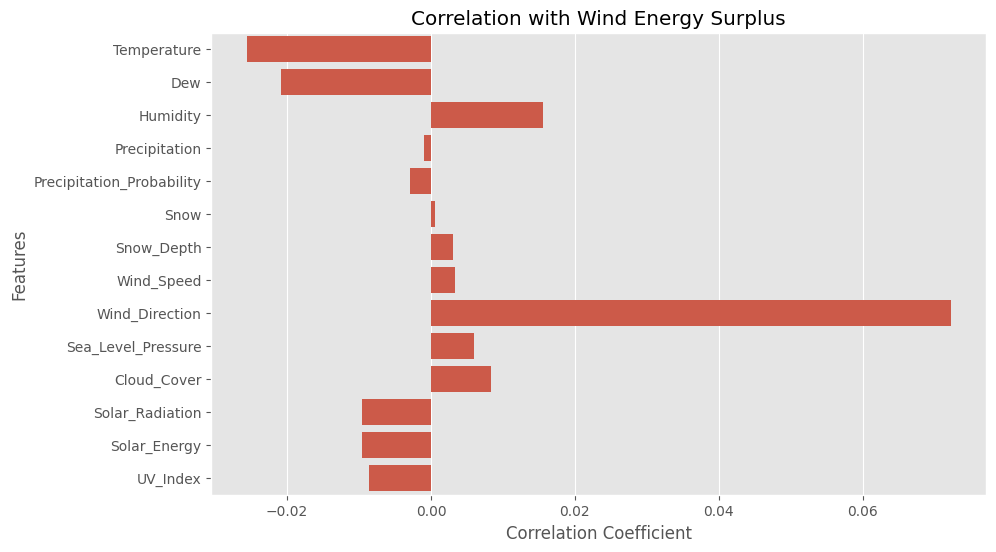

Selected Features based on Correlation:  Index(['Temperature', 'Dew', 'Humidity', 'Wind_Direction'], dtype='object', name=0)


In [ ]:
# Correlation for Wind Energy Surplus
correlation = X1_train.corrwith(y1_train)
# Visualize correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation with Wind Energy Surplus')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
# Select features with the highest correlation using SelectKBest
selector = SelectKBest(score_func=f_regression, k=4)
selector.fit(X1_train, y1_train)
# Selected features
w_features = X1_train.columns[selector.get_support()]
print('Selected Features based on Correlation: ', w_features)

##### My assumption is that the features such as Temperature, Dew, Humidity, and Wind Direction are having some strong association with Wind Energy.
##### If Changes happen in these features will affect Wind Energy either positively or negatively.

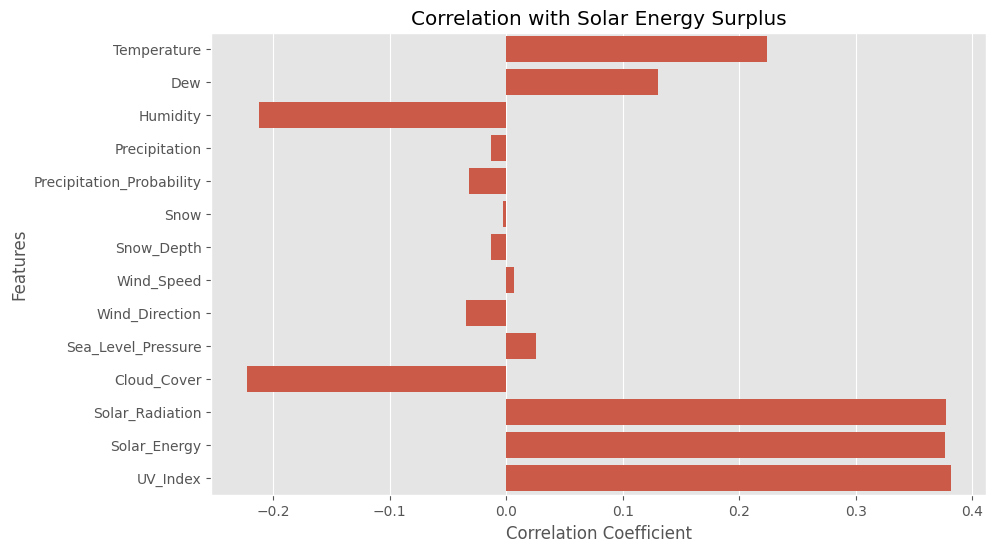

Selected Features based on Correlation:  Index(['Temperature', 'Dew', 'Humidity', 'Cloud_Cover', 'Solar_Radiation',
       'Solar_Energy', 'UV_Index'],
      dtype='object', name=0)


In [ ]:
# Correlation for Solar Energy Surplus
correlation = X2_train.corrwith(y2_train)
# Visualize correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation with Solar Energy Surplus')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
# Select features with the highest correlation using SelectKBest
selector = SelectKBest(score_func=f_regression, k=7)
selector.fit(X2_train, y2_train)
# Selected features
s_features = X2_train.columns[selector.get_support()]
print('Selected Features based on Correlation: ', s_features)

##### My assumption is that the features such as Temperature, Dew, Humidity, Cloud Cover, Solar Radiation, Solar Energy, and UV Index are having some strong association with Solar Energy.
##### If Changes happen in these features will affect Solar Energy either positively or negatively.

In [ ]:
# Making selected Features as predicting features

X1 = city_mt[w_features]
X2 = city_mt[s_features]

In [ ]:
# Split the data into training, and test sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=2)

# Model Prediction, Evaluation, and Hyperparameter Tuning

## Method 1: Logistic Regression

### Wind Energy

In [ ]:
# Initialize logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X1_train, y1_train)

# Predict on the test data
y_pred = model.predict(X1_test)

# Evaluate the model
accuracy = accuracy_score(y1_test, y_pred)
print('Wind Energy Surplus')
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y1_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))

Wind Energy Surplus
Accuracy: 0.9988361052405893
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32593
           1       0.65      0.71      0.68        56

    accuracy                           1.00     32649
   macro avg       0.82      0.86      0.84     32649
weighted avg       1.00      1.00      1.00     32649

Confusion Matrix:
[[32571    22]
 [   16    40]]


### Solar Energy

In [ ]:
# Initialize logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X2_train, y2_train)

# Predict on the test data
y_pred = model.predict(X2_test)

# Evaluate the model
accuracy = accuracy_score(y2_test, y_pred)
print('Solar Energy Surplus')
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y2_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y2_test, y_pred))

Solar Energy Surplus
Accuracy: 0.990106894545009
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31946
           1       0.83      0.68      0.75       703

    accuracy                           0.99     32649
   macro avg       0.91      0.84      0.87     32649
weighted avg       0.99      0.99      0.99     32649

Confusion Matrix:
[[31850    96]
 [  227   476]]


## Method 2: Random Forest Classifier with Hyper Parameter Tuning

### Wind Energy

In [ ]:
# Hyperparameter Tuning and cross-validation

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV with Random Forest classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X1_train, y1_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Model Training and Evaluation with Best Hyperparameters

# Extract best hyperparameters
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

# Train Random Forest classifier with best hyperparameters on the full training set
best_rf_model = RandomForestClassifier(random_state=2,
                                       n_estimators=best_n_estimators,
                                       max_depth=best_max_depth,
                                       min_samples_split=best_min_samples_split,
                                       min_samples_leaf=best_min_samples_leaf)
best_rf_model.fit(X1_train, y1_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X1_test)

# Evaluate the model's performance
accuracy = accuracy_score(y1_test, y_pred)
print("Test Accuracy with Best Hyperparameters:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y1_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}
Test Accuracy with Best Hyperparameters: 0.9989279916689638
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32593
           1       0.66      0.79      0.72        56

    accuracy                           1.00     32649
   macro avg       0.83      0.89      0.86     32649
weighted avg       1.00      1.00      1.00     32649

Confusion Matrix:
[[32570    23]
 [   12    44]]


### New dataset for Prediction and Decision Making

In [ ]:
# Predictor Variables
X1 = city_p[w_features]

# Target Variable
y1 = city_p.WindEnergy_Surplus

### Prediction Accuracy of Wind Energy Surplus for Unseen Data

In [ ]:
predicted_probabilities = best_rf_model.predict_proba(X1)[:, 1]  # Probability of positive class (energy surplus)

# Decision Making

# Make decisions based on the predicted probabilities
threshold = 0.5  # Example threshold for decision making
predicted_classes1 = (predicted_probabilities > threshold).astype(int)  # Convert probabilities to binary classes

# Evaluate the model's performance
accuracy = accuracy_score(y1, predicted_classes1)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y1, predicted_classes1))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y1, predicted_classes1))

Accuracy: 0.9991178740765244
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18107
           1       0.71      0.81      0.76        31

    accuracy                           1.00     18138
   macro avg       0.86      0.90      0.88     18138
weighted avg       1.00      1.00      1.00     18138

Confusion Matrix:
[[18097    10]
 [    6    25]]


### False Positive of Wind Energy Surplus

In [ ]:
tn, fp, fn, tp = confusion_matrix(y1, predicted_classes1).ravel()

# False positives are the values in the second row and first column of the confusion matrix
false_positives = fp

# Total number of actual negative instances
total_actual_negatives = tn + fp

# Calculate false positive rate (FPR)
false_positive_rate = false_positives / total_actual_negatives

print("False Positives:", false_positives)
print("False Positive Rate (FPR):", false_positive_rate)

False Positives: 10
False Positive Rate (FPR): 0.0005522726017562269


### Solar Energy

In [ ]:
# Hyperparameter Tuning and cross-validation

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV with Random Forest classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X2_train, y2_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Model Training and Evaluation with Best Hyperparameters

# Extract best hyperparameters
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

# Train Random Forest classifier with best hyperparameters on the full training set
best_rf_model = RandomForestClassifier(random_state=2,
                                       n_estimators=best_n_estimators,
                                       max_depth=best_max_depth,
                                       min_samples_split=best_min_samples_split,
                                       min_samples_leaf=best_min_samples_leaf)
best_rf_model.fit(X2_train, y2_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X2_test)

# Evaluate the model's performance
accuracy = accuracy_score(y2_test, y_pred)
print("Test Accuracy with Best Hyperparameters:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y2_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y2_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Test Accuracy with Best Hyperparameters: 0.9999693711905419
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31946
           1       1.00      1.00      1.00       703

    accuracy                           1.00     32649
   macro avg       1.00      1.00      1.00     32649
weighted avg       1.00      1.00      1.00     32649

Confusion Matrix:
[[31945     1]
 [    0   703]]


### New dataset for Prediction and Decision Making

In [ ]:
# New dataset for Prediction and Decision Making

# Predictor Variables
X2 = city_p[s_features]

# Target Variable
y2 = city_p.SolarEnergy_Surplus

### Prediction Accuracy of Solar Energy Surplus for Unseen data

In [ ]:
predicted_probabilities = best_rf_model.predict_proba(X2)[:, 1]  # Probability of positive class (energy surplus)

# Decision Making

# Make decisions based on the predicted probabilities
threshold = 0.5  # Example threshold for decision making
predicted_classes2 = (predicted_probabilities > threshold).astype(int)  # Convert probabilities to binary classes

# Evaluate the model's performance
accuracy = accuracy_score(y2, predicted_classes2)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y2, predicted_classes2))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y2, predicted_classes2))

Accuracy: 0.9989524754658727
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17162
           1       0.98      1.00      0.99       976

    accuracy                           1.00     18138
   macro avg       0.99      1.00      0.99     18138
weighted avg       1.00      1.00      1.00     18138

Confusion Matrix:
[[17143    19]
 [    0   976]]


### False Positive of Solar Energy Surplus

In [ ]:
tn, fp, fn, tp = confusion_matrix(y2, predicted_classes2).ravel()

# False positives are the values in the second row and first column of the confusion matrix
false_positives = fp

# Total number of actual negative instances
total_actual_negatives = tn + fp

# Calculate false positive rate (FPR)
false_positive_rate = false_positives / total_actual_negatives

print("False Positives:", false_positives)
print("False Positive Rate (FPR):", false_positive_rate)

False Positives: 19
False Positive Rate (FPR): 0.0011070970749329915
